# Assignment: EDA and Visualization
## Krishu Wadhwa - euj7fh
## October 28, 2024

Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.  
Questions Chosen: **Q0, Q1 and Q4**.

# Question 0

Please answer the following questions in your own words.

**1. What makes a model "linear"? "Linear" in what?**  
A model is considered "linear" when it weighs the explanatory variables optimally to predict an outcome variable, forming a linear relationship between inputs and outputs. They are usually simple and have limited parameters.  

**2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)**  
The coefficient for a dummy/one-hot-encoded variable represents the difference in the expected value of the dependent variable between that category and the baseline category, holding all other variables constant. The baseline category is implicitly represented by the intercept term in the regression model.

**3. Can linear regression be used for classification? Explain why, or why not.**  
Linear regression is not ideal for classification because it is designed for predicting continuous outcomes, not categorical labels. While you can separate the outcomes into classes using thresholds, this could lead to poor classification performance or unreliable predictions.

**4. What are signs that your linear model is over-fitting?**  
Over-fitting is when the model is too complex and fits the training data too closely. This leads to poor outcomes/predictions on unseen data. Thus, the first clear sign that a model is overfitting is if the the model has high accuracy with the training data but low accuracy with the test data. Another sign could be high variance, such as the model fluctuating highly when applied to very similar data.

**5. Clearly explain multi-colinearity using the two-stage least squares technique.**  
Multicollinearity is when the independent variables in a regression model are highly correlated, and the reason this is an issue is because it is extremely hard to predict the individual effects of the variables (essentially creates a mush). The two-stage least squares technique helps address this issue by first using an instrument variable (related to the problematic variables) to create a new predicted variable. Next, these predicted/estimated values are replaced by the problematic independent variables/predictors in the regression, and this leads to outcomes which are more reliable and accurate.  

**6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable `y` and your features/control/response/independent variables `x`?**  
The first way you could do this would be through feature transformations where we can apply non-linear transformations to existing features. For example, x could be transformed to x^2 or x^3 or even log(x). After transforming these variables, they are then inputted back into the linear regression model, allowing the model to now demonstrate more complex relationships between x and y. Another way to do this is by creating an interaction term. Here, two explanatory variables (such as x_1 and x_2) are taken and then multiplied together to get a new independent/explanatory variable. For example z = x_1 * x_2 could be something like mileage x age. This helps the model to analyze the combined effect of these independent variables on the outcome.

**7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?**  
The intercept is the expected value of the outcome variable y when all independent variables (x's) are equal to zero. It is essentially the base value of y (when no independent variables are influencing the outcome). The slope coefficient is the average change of the outcome variable y for a one-unit increase in the independent variable x (given everything else is constant). This shows the strength, as well as the direction (if it is positive or negative) of the linear relationship between x and y. Finally, the coefficient for a dummy/one-hot-encoded variable represents the difference in the expected value of the dependent variable between that category and the baseline/reference category, holding all other variables constant. 

# Question 1

<br />

Load `./data/Q1_clean.csv`. The data include

`Price` - per night  
`Review Scores Rating` - The average rating for the property  
`Neighbourhood` - The bourough of NYC. Note the space, or rename the variable.  
`Property Type` - The kind of dwelling  
`Room Type` - The kind of space being rented  

In [41]:
# imports 
import requests
import urllib.request
import streamlit as st
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline

In [18]:
url = 'https://raw.githubusercontent.com/kweuj7fh/DS3001-Linear_Regression/refs/heads/main/data/Q1_clean.csv' # url of data
data = pd.read_csv(url, low_memory=False) # read csv from url
data.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


**1. Compute the average prices and scores by `Neighbourhood`; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood`.**

In [24]:
# Compute the average prices and scores by `Neighbourhood`
prices = data.groupby('Neighbourhood ').agg(Average_Price=('Price', 'mean'))
prices.sort_values(by = 'Average_Price', ascending = False)

,Average_Price
Neighbourhood,
Manhattan,183.664286
Staten Island,146.166667
Brooklyn,127.747378
Queens,96.857233
Bronx,75.276498


In [27]:
prices.groupby('Neighbourhood ').describe() 

Average_Price                                          \
                       count        mean std         min         25%   
Neighbourhood                                                          
Bronx                    1.0   75.276498 NaN   75.276498   75.276498   
Brooklyn                 1.0  127.747378 NaN  127.747378  127.747378   
Manhattan                1.0  183.664286 NaN  183.664286  183.664286   
Queens                   1.0   96.857233 NaN   96.857233   96.857233   
Staten Island            1.0  146.166667 NaN  146.166667  146.166667   

                                                    
                       50%         75%         max  
Neighbourhood                                       
Bronx            75.276498   75.276498   75.276498  
Brooklyn        127.747378  127.747378  127.747378  
Manhattan       183.664286  183.664286  183.664286  
Queens           96.857233   96.857233   96.857233  
Staten Island   146.166667  146.166667  146.166667

Which bourough is the most expensive on average?

Manhattan is the most expensive borough, on average. It has a mean price of $183.66 per night. Moreover, it has the most expensive price per night as well, at $10,000. In terms of pricing distribution, Manhattan is also the highest in the quartile metrics, with the 25th, 50th (median), and 75th percentiles priced at $103, $150, and $214, respectively.


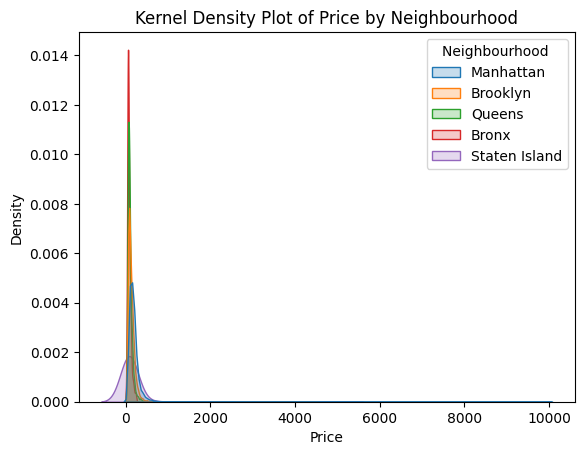

In [28]:
# Create a kernel density plot of price, grouping by `Neighbourhood`
sns.kdeplot(data = data, x = 'Price', hue = 'Neighbourhood ')

plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

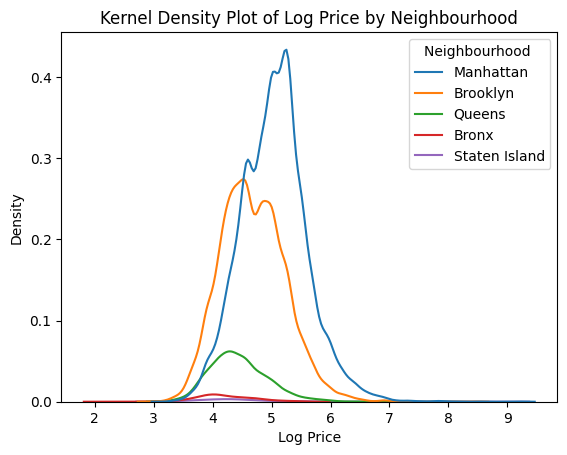

In [29]:
# Create a kernel density plot of log price, grouping by `Neighbourhood`
sns.kdeplot(x = np.log(data['Price']), hue = data['Neighbourhood '])

plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()

**2. Regress price on `Neighbourhood` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?**

In [32]:
y = data['Price']
X = pd.get_dummies(data['Neighbourhood '], dtype = 'int')

regression = linear_model.LinearRegression(fit_intercept = False).fit(X,y)
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
results

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


The coefficients shown in the results table from the regression analysis of the neighbourhood dummy variables above are the same values as the mean values of the boroughs in the table from part 1. Since there are no control variables, the regression simply computes the averages of each of the boroughs. 

**3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?**

In [39]:
y = data['Price']
X = pd.get_dummies(data['Neighbourhood '], dtype = 'int', drop_first = True)

regression = linear_model.LinearRegression(fit_intercept = True).fit(X,y)
results = pd.DataFrame({'variable':regression.feature_names_in_, 'coefficient': regression.coef_})
results

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [40]:
intercept = regression.intercept_
print("Intercept: $" + str(intercept))

results = pd.DataFrame({'variable':regression.feature_names_in_, 
                        'coefficient': regression.coef_ + regression.intercept_})
results

Intercept: $75.27649769584711


,variable,coefficient
0,Brooklyn,127.747378
1,Manhattan,183.664286
2,Queens,96.857233
3,Staten Island,146.166667


Leaving an intercept in the linear model meant that one category is dropped (as seen above we know the Bronx was dropped), and that category becomes the reference category. The intercept value, which in this case was approximately $75.28, represents the average price for the Bronx (which matches that from above). All the coefficients in the regression would now be relative to the reference (Bronx). For example, the coefficient $108.39 for Manhattan shows that the average price in Manhattan is $108.39 more than the Bronx. This makes sense as $75.27649769584711 + $108.387789 = 183.66. The coefficients therefore reflect the difference from the baseline/reference group. When you add them to the intercept, it gives the actual prices seen above.

**4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood`. What is the `R^2` and `RMSE` on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**

In [42]:
y = data['Price']
X = data[['Review Scores Rating', 'Neighbourhood ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state = 100) 

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype = 'int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype = 'int')], axis = 1)

# run a regression of `Price` on `Review Scores Rating` and `Neighbourhood`
regression = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train)

y_hat = regression.predict(Z_test)
print('Rsq: ', regression.score(Z_test,y_test)) # What is the R^2 on the test set?
rmse = np.sqrt( np.mean( (y_test - y_hat) ** 2 ))
print('RMSE: ', rmse) # What is the RMSE on the test set? 

results = pd.DataFrame({'variable': regression.feature_names_in_, 'coefficient': regression.coef_})
results

Rsq:  0.06701086106947252
RMSE:  125.01092061382934


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


The `R^2` on the test set is 0.067. This shows that 6.7% of the variance in `Price` is explained by the model. The `RMSE` on the test set is 125.109, suggesting high variability in predicted versus actual prices. The coefficient on `Review Scores Rating` was 1.032. This shows that for each additional unit increase in the rating, the price is expected to increase by about \$1.03 (holding neighborhood constant). The most expensive type of property you can buy is an apartment in Manhattan with a coefficient of 89.421. The estimated price can be found by: 100 * 1.032257 + 89.421020 = 192.64672 $\approx$ \$192.65.

**5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood` and `Property Type`. What is the `R^2` and `RMSE` on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**

In [43]:
y = data['Price']
X = data[['Review Scores Rating', 'Neighbourhood ', 'Room Type']]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = .2, 
                                                    random_state = 100) 

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['Neighbourhood '], dtype = 'int'),
                    pd.get_dummies(X_train['Room Type'], dtype = 'int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype = 'int'),
                    pd.get_dummies(X_test['Room Type'], dtype = 'int')],
                    axis = 1)

# run a regression of `Price` on `Review Scores Rating` and `Neighbourhood` and `Property Type
regression = linear_model.LinearRegression(fit_intercept = False).fit(Z_train, y_train)

y_hat = regression.predict(Z_test)
print('Rsq: ', regression.score(Z_test,y_test)) # What is the R^2 on the test set?
rmse = np.sqrt( np.mean( (y_test - y_hat) ** 2 ))
print('RMSE: ', rmse) # What is the RMSE on the test set? 

results = pd.DataFrame({'variable': regression.feature_names_in_, 'coefficient': regression.coef_})
results

Rsq:  0.2203534812928234
RMSE:  114.27692123130632


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


The `R^2` on the test set is 0.22. This shows that 22% of the variance in `Price` is explained by the model. The `RMSE` on the test set is 114.2769, suggesting high variability in predicted versus actual prices. The coefficient on `Review Scores Rating` was 0.626912. This shows that for each additional unit increase in the rating, the price is expected to increase by about \$0.63 (holding other variables constant). The most expensive type of property you can buy is an entire home/apartment in Manhattan with coefficients of 110.618 (entire home/apartment) and 53.693 (Manhattan). The estimated price can be found by: 100 * 0.626912 + 110.617820 + 53.693304 = 227.002324 $\approx$ \$227.00.

**6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.**

In part 4, the coefficient on `Review Scores Rating` was about 1.03, whereas in part 5, it was about 0.63. This is a good way to note how introducing more variables in linear regression can work. When we do multiple linear regression, we can see how each variable's coefficient affects the dependent variable (holding all others constant). In part 4, there was no `Room Type`. As such, the coefficient of `Review Scores Rating` suggested that each additional one-unit increase in rating led to an increase of $1.03 in nightly price (holding `Neighbourhood` constant). However, once `Room Type` was introduced in part 5, the coefficient on `Review Scores Rating` dropped from 1.03 to 0.63. This then suggested that each additional one-unit increase in rating led to an increase of $0.63 in nightly price (holding all other variables constant). This change shows that some of the variation in prices associated with rating and neighborhood was explained by the types of rooms available in each neighborhood. Once `Room Type` was controlled for, the coefficient on `Review Scores Rating` decreased.

# Question 4

<br />

This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$
 

**1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get**

$$
\sum_{i=1}^{N} -2(y_i - a - b z_i) = 0
$$

$$
\sum_{i=1}^{N} -2(y_i - a - b z_i)z_i = 0
$$

Given the SSE:

$$
\text{SSE}(a, b) = \sum_{i=1}^{N} (y_i - a - b z_i)^2,
$$

First we differentiate the SSE with respect to a. 

$$
\frac{\partial \text{SSE}}{\partial a} = \sum_{i=1}^{N} 2(y_i - a - b z_i)(-1).
$$

$$
\frac{\partial \text{SSE}}{\partial a} = -2 \sum_{i=1}^{N} (y_i - a - b z_i).
$$

$$
-2 \sum_{i=1}^{N} (y_i - a - b z_i) = 0. 
$$


$$
\sum_{i=1}^{N} (y_i - a - b z_i) = 0.
$$

Now we differentiate the SSE with respect to b. 

$$
\frac{\partial \text{SSE}}{\partial b} = \sum_{i=1}^{N} 2(y_i - a - b z_i)(-z_i).
$$

$$
\frac{\partial \text{SSE}}{\partial b} = -2 \sum_{i=1}^{N} (y_i - a - b z_i)z_i.
$$

$$
-2 \sum_{i=1}^{N} (y_i - a - b z_i)z_i = 0.
$$

$$
\sum_{i=1}^{N} (y_i - a - b z_i)z_i = 0.
$$


**2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get**

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

First, we can solve for $a^{*}$. 

$$
-2 \sum_{i=1}^{N} (y_i - a - b z_i) = 0
$$

$$
\sum_{i=1}^{N} (y_i - a - b z_i) = 0
$$

$$
\sum_{i=1}^{N} (y_i) - aN - b \sum_{i=1}^{N} (z_i)  = 0
$$

Since $\bar{z} = 0$, we have:

$$
b \sum_{i=1}^{N} (z_i)  = 0
$$

Thus,
$$
\sum_{i=1}^{N} (y_i) - aN  = 0
$$

If we set the equation to a:
$$
a = \frac{\sum_{i=1}^{N} (y_i)}{N}
$$

Finally, we get:
$$
a^{*} = \bar{y}
$$

Now,  we can solve for $b^{*}$.

$$
-2 \sum_{i=1}^{N} (y_i - a - b z_i)z_i = 0.
$$

$$
\sum_{i=1}^{N} (y_i - a - b z_i)z_i = 0.
$$

Now we substitute $a^{*} = \bar{y}$:

$$
\sum_{i=1}^{N} (y_i - \bar{y} - b z_i)z_i = 0.
$$

$$
\sum_{i=1}^{N} (y_i - \bar{y})(z_i) - b \sum_{i=1}^{N} (z_i)^2 = 0.
$$

$$ 
\sum_{i=1}^{N} (y_i - \bar{y})(z_i) = b \sum_{i=1}^{N} (z_i)^2
$$

If we set the equation to b we get:
$$
b^{*} = \frac{\sum_{i=1}^{N} (y_i - \bar{y})(z_i)}{\sum_{i=1}^{N} (z_i)^2}
$$




**3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get**
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

**which can be written in terms of sample covariance and sample variance as:**

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

**This is typically the preferred way of expressing the OLS coefficients.**

From the last part of the question, we have:
$$
a^{*} = \bar{y}  \\
\\  
b^{*} = \frac{\sum_{i=1}^{N} (y_i - \bar{y})(z_i)}{\sum_{i=1}^{N} (z_i)^2}
$$

Now, if we substitute $z_i = x_i - \bar{x}$ back into the above equations, we get:

$$
b^{*} = \frac{\sum_{i=1}^{N} (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

Here, the numerator $\sum_{i=1}^{N} (y_i - \bar{y})(x_i - \bar{x})$ represents the sample covariance between $x$ and $y$. Therefore:

$$
\sum_{i=1}^{N} (y_i - \bar{y})(x_i - \bar{x}) = \text{cov}(x, y)
$$

Similarly, the denominator $\sum_{i=1}^{N} (x_i - \bar{x})^2$ represents the sample variance of $x$. Therefore:
$$
\sum_{i=1}^{N} (x_i - \bar{x})^2 = \text{var}(x)
$$

Substituting both the numerator and denominator back into $b^{*}$, we get:

$$
a^{*} = \bar{y} \\

b^{*} = \frac{\text{cov}(x, y)}{\text{var}(x)}
$$

**4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?**

The value of $b^*$ depends on the relationship between the covariance of $x$ and $y$ and the variance of $x$ due to the previous equation from part 3: $b^{*} = \frac{\text{cov}(x, y)}{\text{var}(x)}$.
Therefore, $b^{*}$ would be large when there is a strong linear relationship between $x$ and $y$. This is because this would lead to a large covariance $\text{cov}(x, y)$. $b^{*}$ would also be large in the case when $\text{var}(x)$ is small. This would be the case when $x$ does not vary highly. On the contrary, $b^{*}$ would be small when there is a weak linear relationship between $x$ and $y$. This is because this would lead to a small covariance $\text{cov}(x, y)$. Moreover, $b^{*}$ would also be small when $\text{var}(x)$ is large. This means that $x$ has a lot of variability/"noise". $a^{*}$ is the intercept and it represents the expected value of the outcome/response variable $y$. This is due to the fact that $a^{*} = \bar{y}$.

**5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)**

A measurement error in $x$ would inflate its variance, causing the slope coefficient $b^*$ to shrink due to attenuation bias. This results in predictions that are biased toward zero, underestimating the true relationship between $x$ and $y$. As such, the model's estimates will be more conservative and less sensitive to changes in $x$, reducing the accuracy and reliability of the model's predictions. This is why cleaning data is an important step in data analysis.